# 2.1 Entangling Two Remote Spins

In this notebook we look at a protocol to entangle two remote spins.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute, BasicAer
from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

/Users/jacquescarolan/anaconda2/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


Initialize the registers:

In [3]:
# Initialize Alice registers
q_alice_spin = QuantumRegister(1, 'q_alice_spin')
q_alice_photon = QuantumRegister(1, 'q_alice_photon')
c_alice_spin = ClassicalRegister(1, 'c_alice_spin')
c_alice_photon = ClassicalRegister(1, 'c_alice_photon')

# Build Alices Quantum Circuit
qc_alice = QuantumCircuit(q_alice_spin, q_alice_photon, c_alice_spin, c_alice_photon)

# Initialize Bob registers
q_bob_spin = QuantumRegister(1, 'q_bob_spin')
q_bob_photon = QuantumRegister(1, 'q_bob_photon')
c_bob_spin = ClassicalRegister(1, 'c_bob_spin')
c_bob_photon = ClassicalRegister(1, 'c_bob_photon')

# Build Bobs Quantum Circuit
qc_bob = QuantumCircuit(q_bob_spin, q_bob_photon, c_bob_spin, c_bob_photon)

Perform the operations:

In [4]:
# Alices Opertaions, HINT: you can call each qubit via e.g. q_alice_spin[0] in Alices and Bobs seperate quantum circuits
qc_alice.h(q_alice_spin[0])
qc_alice.cx(q_alice_spin[0], q_alice_photon[0])

# Bobs Operations
qc_bob.h(q_bob_spin[0])
qc_bob.cx(q_bob_spin[0], q_bob_photon[0])

# join alice and bobs circuits together (HINT: you can use plain old '+' for this)
qc = qc_alice + qc_bob
  

# CX between photons
qc.cx(q_bob_photon[0], q_alice_photon[0])
# Hadmard Alices photon
qc.h(q_bob_photon[0])

# Draw just to check
qc.barrier()
qc.draw()

Make measurements:

In [5]:
qc.measure(q_alice_spin[0], c_alice_spin[0])
qc.measure(q_alice_photon[0], c_alice_photon[0])
qc.measure(q_bob_spin[0], c_bob_spin[0])
qc.measure(q_bob_photon[0], c_bob_photon[0])

qc.draw()

Lets look at the counts:

{'0 1 1 0': 131, '0 0 0 0': 118, '0 1 0 1': 130, '1 1 1 0': 153, '1 0 1 1': 124, '1 1 0 1': 131, '1 0 0 0': 110, '0 0 1 1': 127}


/Users/jacquescarolan/anaconda2/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


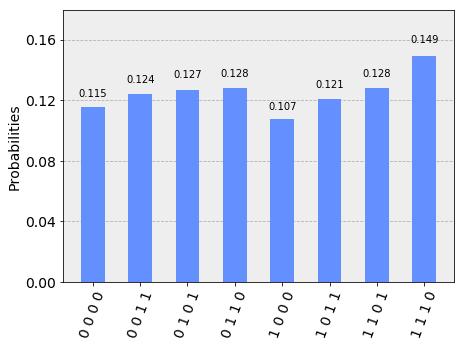

In [6]:
# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')

# select the number of shots (repeats) of the experiment, and run the job

job = execute(qc, backend, shots=1024)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot
plot_histogram(counts)

Basis goes {Bobs Photon, Bobs Spin, Alices Photon, Alices Spin}